In [13]:
import baostock as bs
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib. pyplot as plt 

In [4]:
stock_code = "300721.SZ"

In [11]:
# 下载数据
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+ lg.error_code)
print('login respond  error_msg:'+ lg.error_msg)

rs = bs.query_history_k_data(stock_code, "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST", start_date='2010-01-01', end_date='2021-03-09', frequency="d", adjustflag="3")
print('query_history_k_data respond error_code:'+rs.error_code)
print('query_history_k_data respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():  # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result.to_csv(stock_code + ".csv", encoding="gbk", index=False)

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success


In [10]:
result.dtypes

date           object
code           object
open           object
high           object
low            object
close          object
preclose       object
volume         object
amount         object
adjustflag     object
turn           object
tradestatus    object
pctChg         object
peTTM          object
pbMRQ          object
psTTM          object
pcfNcfTTM      object
isST           object
dtype: object

In [7]:
result[0:5]

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
0,2017-11-15,sz.300721,20.0500,24.0600,20.0500,24.0600,16.7100,8575,205713.5000,3,0.042768,1,43.985640,30.657271,3.573392,1.658425,-15.129562,0
1,2017-11-16,sz.300721,26.4700,26.4700,26.4700,26.4700,24.0600,2640,69880.8000,3,0.013167,1,10.016620,33.728095,3.931326,1.824543,-16.645034,0
2,2017-11-17,sz.300721,29.1200,29.1200,29.1200,29.1200,26.4700,3200,93184.0000,3,0.015960,1,10.011340,37.104728,4.324904,2.007204,-18.311424,0
3,2017-11-20,sz.300721,32.0300,32.0300,32.0300,32.0300,29.1200,6625,212198.7500,3,0.033042,1,9.993125,40.812652,4.757097,2.207786,-20.141308,0
4,2017-11-21,sz.300721,35.2300,35.2300,35.2300,35.2300,32.0300,22158,780626.3400,3,0.110514,1,9.990636,44.890095,5.232361,2.428358,-22.153553,0


In [6]:
i = 0
result[['date', 'close']][i:i+5]

,date,close
0,2017-11-15,24.0600
1,2017-11-16,26.4700
2,2017-11-17,29.1200
3,2017-11-20,32.0300
4,2017-11-21,35.2300


In [5]:
# 读取csv文件
stock = pd.read_csv(stock_code + ".csv")

In [6]:
stock.dtypes

date            object
code            object
open           float64
high           float64
low            float64
close          float64
preclose       float64
volume           int64
amount         float64
adjustflag       int64
turn           float64
tradestatus      int64
pctChg         float64
peTTM          float64
pbMRQ          float64
psTTM          float64
pcfNcfTTM      float64
isST             int64
dtype: object

In [7]:
stock['variation'] = (stock['close'] - stock['close'].shift(1))/stock['close'].shift(1) * 100
stock['variation'] 

0            NaN
1      10.016625
2      10.011334
3       9.993132
4       9.990634
         ...    
800    -0.377054
801    -1.865369
802    -0.055096
803    -1.626240
804    -6.976744
Name: variation, Length: 805, dtype: float64

In [83]:
for i in range(-20, 21, 2):
    print(i, end=', ')


-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 

In [89]:
# https://blog.csdn.net/qq_41892229/article/details/109702038
stock_bins = [-10, -5, -3, 3, 5, 10]
stock_GEM_bins = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]   # 创业板
labels = stock_GEM_bins.copy()
labels.remove(0)
a, b = pd.cut(x=stock['variation'], bins=stock_GEM_bins, retbins=True, right=True, labels= labels)

In [90]:
a.value_counts(sort=False)

-20      0
-18      0
-16      0
-14      0
-12      7
-10     10
-8      23
-6      37
-4     122
-2     189
 2     219
 4     110
 6      45
 8       9
 10     15
 12     17
 14      1
 16      0
 18      0
 20      0
Name: variation, dtype: int64

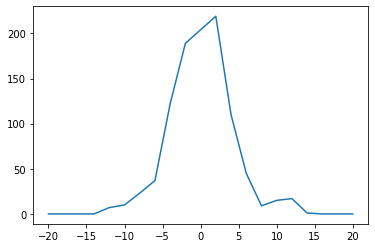

In [91]:
plt.plot(a.value_counts(sort=False).index, a.value_counts(sort=False).values)

[]